# Sentiment Analysis with Hotel Reviews

## Read and Explore data (EDA)

In [1]:
import parsivar
from parsivar import Normalizer, Tokenizer, FindStems, POSTagger, FindChunks, DependencyParser, SpellCheck 

In [6]:
from pandas import read_excel
my_sheet = 'Sheet2' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = r'C:\Users\Zahra\Downloads\Labeled-Sentences.xlsx' 
df = read_excel(file_name, sheet_name = my_sheet)

In [7]:
df.head()

,Unnamed: 0,star,label,good=1,fair=0,excellent=2
0,واقعا هتل خوبی بود...از لحاظ نزدیکی به دریا وم...,5,2,NaN,NaN,NaN
1,از همه مهمتر پرسنل های خیلی خوبی داشت,5,2,NaN,NaN,NaN
2,من ب این هتل امتیاز کامل میدم,5,2,NaN,NaN,NaN
3,از نظر ترانسفر فرودگاهی بسیار عالی برخورد,4,2,NaN,NaN,NaN
4,پرسنل عالی برخورد رستوران حرف نداشت,4,2,NaN,NaN,NaN


Description of each columns:

Unnamed:0 : people's opinion about hotel

star : star of the hotel people say about

label : people sentiment about that hotel (1:good, 0:fair, excellent:2)

**unnamed:0 and star are features and label is target.**

In [9]:
df['Unnamed: 0'][0]

'واقعا هتل خوبی بود...از لحاظ نزدیکی به دریا ومراکز خرید'

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 6 columns):
Unnamed: 0     703 non-null object
star           703 non-null int64
label          703 non-null int64
good=1         0 non-null float64
fair=0         0 non-null float64
excellent=2    0 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 33.0+ KB


In [13]:
df.shape

(703, 6)

In [14]:
df.describe()

,star,label,good=1,fair=0,excellent=2
count,703.000000,703.000000,0.0,0.0,0.0
mean,4.278805,1.645804,NaN,NaN,NaN
std,0.783878,0.738449,NaN,NaN,NaN
min,1.000000,0.000000,NaN,NaN,NaN
25%,4.000000,2.000000,NaN,NaN,NaN
50%,4.000000,2.000000,NaN,NaN,NaN
75%,5.000000,2.000000,NaN,NaN,NaN
max,5.000000,2.000000,NaN,NaN,NaN


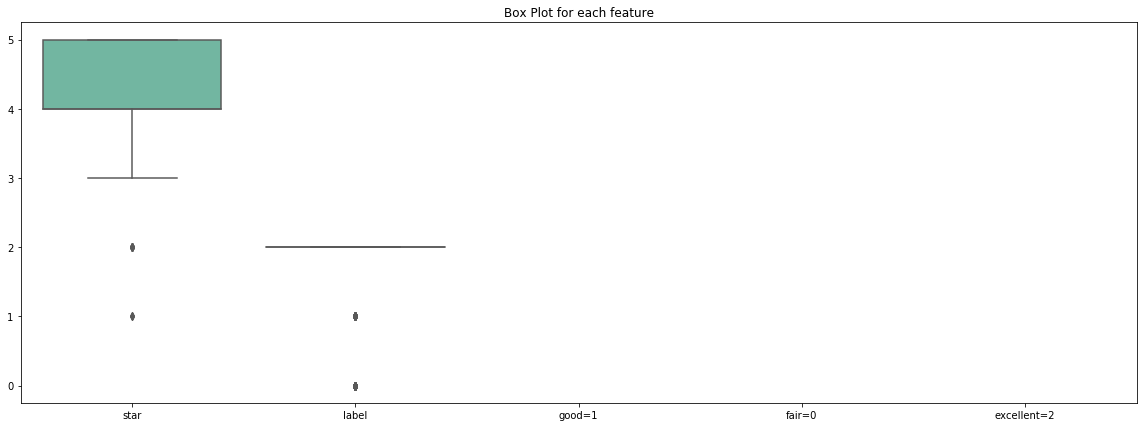

In [53]:
import seaborn as sns

fig = plt.figure(figsize =(20, 7))
# Creating Box plot
ax = sns.boxplot(data=df, orient="v", palette="Set2")
plt.title("Box Plot for each feature")
plt.show()

we shoudl treat outlier data.--> star

In [15]:
df.label.value_counts()

2    565
0    111
1     27
Name: label, dtype: int64

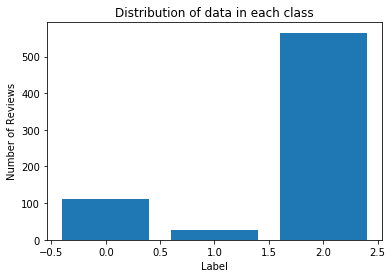

In [20]:
# distribution of data in each class
distribution = list(df.label.value_counts())

import matplotlib.pyplot as plt
plt.bar([2, 0, 1] ,distribution)
plt.xlabel("Label")
plt.ylabel("Number of Reviews")
plt.title("Distribution of data in each class")
plt.show()

As we see, number of reviews in class 2 (excellent) are more than other classes. So it may cause bias in our model.And it's better to have balanced data, but now we don't treat this problem to see the result of models.

In [42]:
# sample fair review
df[df['label']==0].sample(n=1)['Unnamed: 0'].iloc[0]

'تمیزه، تازه بازسازی شده و همه چی نو به نظر میاد غیر از مبل داخل اتاق ها، اما مبلمان و تخت ها و کمدها خیلی بی کیفیته ممکنه در کمد رو که باز کنین بشکنه'

In [43]:
# sample good review
df[df['label']==1].sample(n=1)['Unnamed: 0'].iloc[0]

' فقط نور اتاقها کم بود ولی اتاق بزرگ و خوبی بهمون دادن'

In [45]:
# sample exellent review
df[df['label']==2].sample(n=1)['Unnamed: 0'].iloc[0]

' خود هتل هم نسبت به سایر هتلهای شمال شیک و مدرن به نظر میرسید '

In [60]:
def data_preprocessing(review):
    
    # normalizing the text
    normalizer = Normalizer()
    review = normalizer.normalize(review)
    
    # spell correction
    checker = SpellCheck()
    review = checker.spell_corrector(review)
    
    # sentence segmentation
    tokenizer = Tokenizer()
    words = tokenizer.tokenize_words(review)
    
    # stemming 
    stemmer = FindStems()
    review = [stemmer.convert_to_stem(word) for word in words]
    
    # join words in preprocessed review
    review = ' '.join(review)
    
    return review

In [61]:
df['preprocessing_review'] = df['Unnamed: 0'].apply(lambda review: data_preprocessing(review))

In [62]:
df.head()

,Unnamed: 0,star,label,good=1,fair=0,excellent=2,preprocessing_review
0,واقعا هتل خوبی بود...از لحاظ نزدیکی به دریا وم...,5,2,NaN,NaN,NaN,واقعا هتل خوبی‌بود ... از لحاظ نزدیکی به دریا ...
1,از همه مهمتر پرسنل های خیلی خوبی داشت,5,2,NaN,NaN,NaN,از همه مهم پرسنل خیلی خوبی داشت&دار
2,من ب این هتل امتیاز کامل میدم,5,2,NaN,NaN,NaN,من ب این هتل امتیاز کامل مردم
3,از نظر ترانسفر فرودگاهی بسیار عالی برخورد,4,2,NaN,NaN,NaN,از نظر ترانسفر فرودگاه بسیار عالی برخورد
4,پرسنل عالی برخورد رستوران حرف نداشت,4,2,NaN,NaN,NaN,پرسنل عالی برخورد رستوران حرف داشت&دار


In [63]:
df['preprocessing_review'][0]

'واقعا هتل خوبی\u200cبود ... از لحاظ نزدیکی به دریا و مرکز خرید'

In [ ]:
from sklearn.model_selection import train_test_split_test_split

data = df.copy()
y = data['label'].values
data.drop(labels=['label', 'good=1', 'fair=0', 'excellent=2'], axis=1, inplace=True) # remove useless columns

data.head()

In [ ]:
# split train and test
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

print(f'Train data: {X_train.shape} {y_train.shape}')
print(f'Test data: {X_test.shape} {y_test.shape}')

## Extract Featurs

### Bag of words

In [ ]:
from sklearn.features_extraction